# `microdf` charts

This example requires `taxcalc` to be installed.

## Setup

In [1]:
import numpy as np
import pandas as pd

import microdf as mdf

In [2]:
mdf.set_plot_style()

## Prepare data

In [3]:
base = mdf.calc_df(group_vars=['expanded_income', 'MARS'],
                   metric_vars=['aftertax_income', 'XTOT'])

In [4]:
reform = base.copy(deep=True)
UBI_PP = 10000
reform['ubi'] = reform.XTOT * UBI_PP
reform['aftertax_income'] = reform.aftertax_income + reform.ubi
mdf.add_weighted_metrics(reform, 'aftertax_income')

## Charts

#### Change to income percentiles

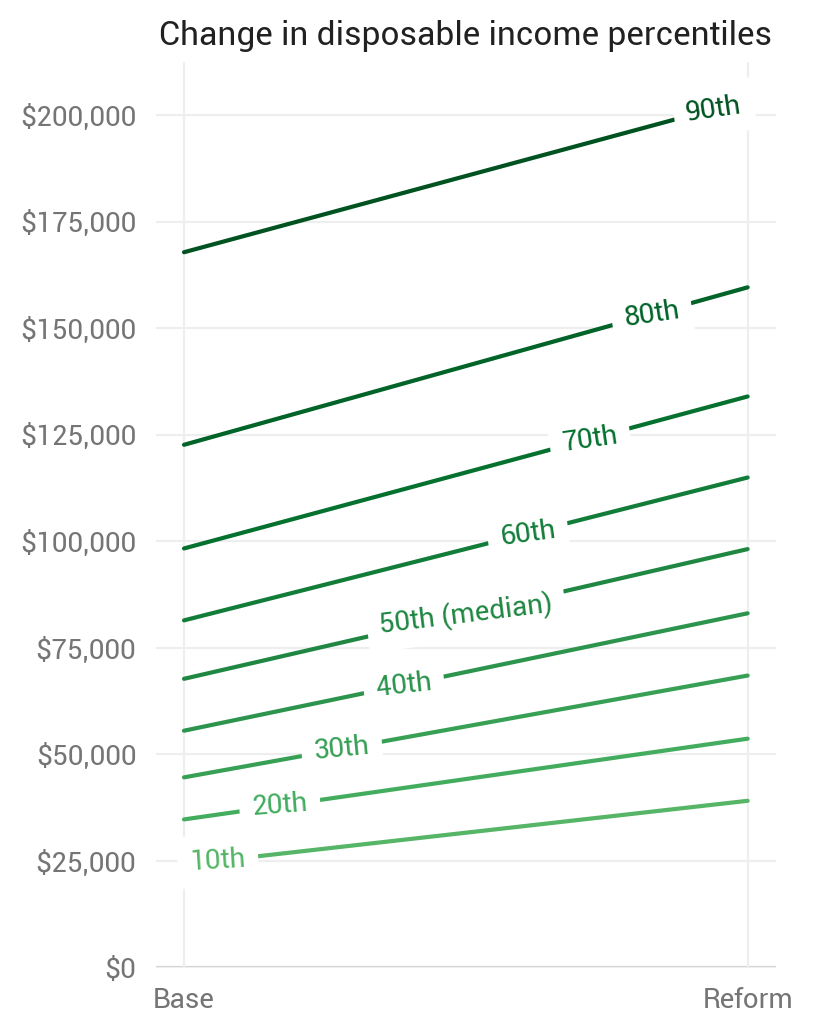

In [5]:
ax = mdf.quantile_chg_plot(base.aftertax_income, reform.aftertax_income,
                           base.XTOT_m, reform.XTOT_m)

/home/mghenis/miniconda3/lib/python3.7/site-packages/microdf/charts.py:70: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines, baseline = ax.stem(df.index_newline, df.pct_chg)


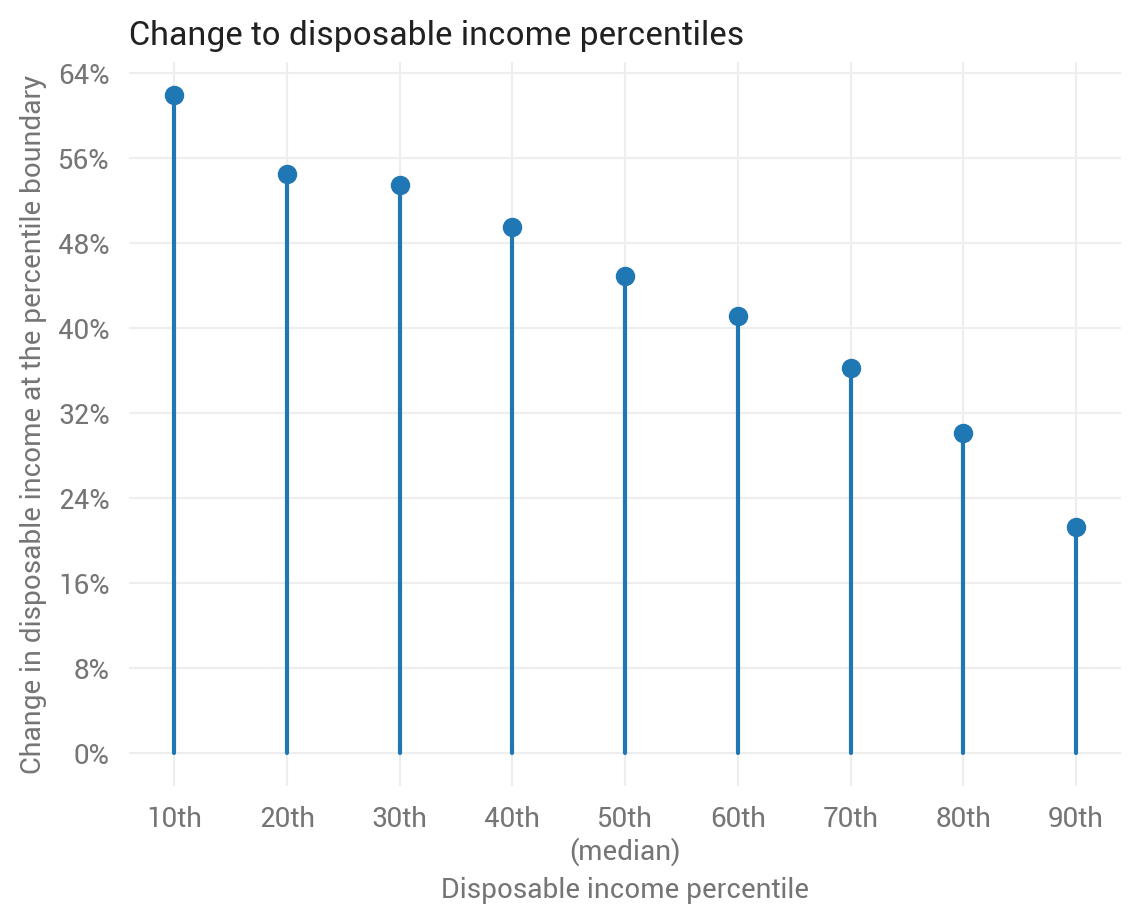

In [6]:
ax = mdf.quantile_pct_chg_plot(base.aftertax_income, reform.aftertax_income,
                               base.XTOT_m, reform.XTOT_m)

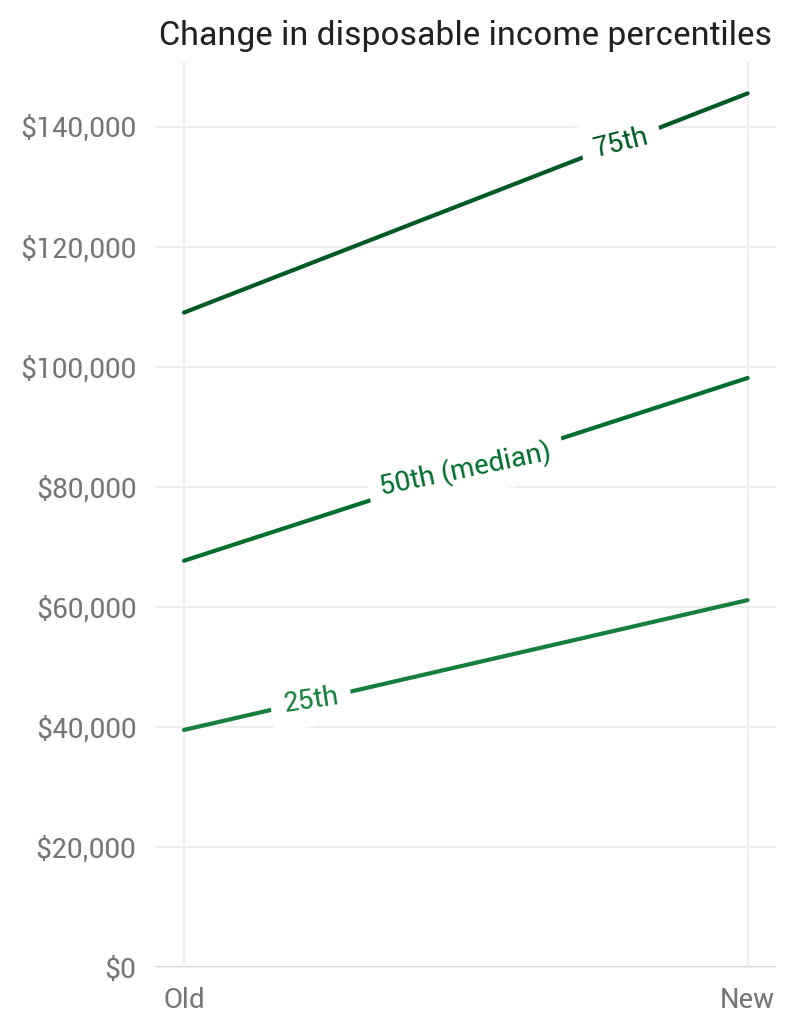

In [7]:
ax = mdf.quantile_chg_plot(base.aftertax_income, reform.aftertax_income,
                           base.XTOT_m, reform.XTOT_m,
                           q=np.arange(0.25, 1, 0.25),
                           label1='Old', label2='New')

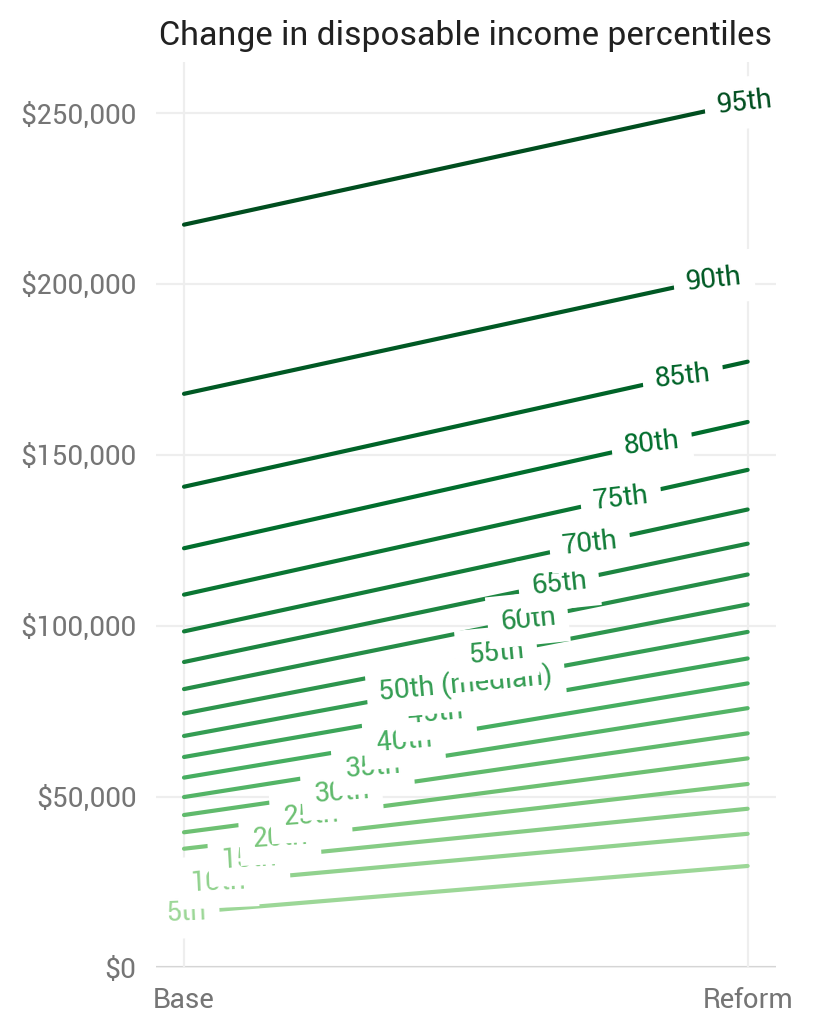

In [8]:
ax = mdf.quantile_chg_plot(base.aftertax_income, reform.aftertax_income,
                           base.XTOT_m, reform.XTOT_m,
                           q=np.arange(0.05, 1, 0.05))